# **Detecting Fake News with Machine Learning**

Dataset we are using in this notebook: https://umkc.box.com/s/2wj6m44uspieqobynnegdsjc59yijm2n

[Linear Models - Scikit Learn](https://scikit-learn.org/stable/modules/linear_model.html#perceptron)
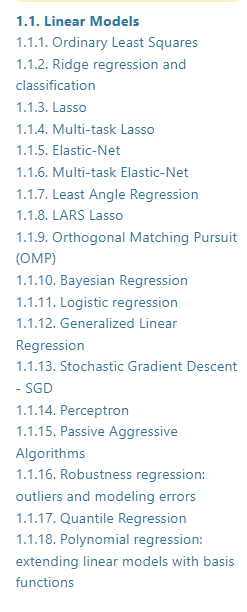

In [22]:
#import modules
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.decomposition import PCA
import seaborn as sns
import random


In [23]:
#Gdrive access
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [24]:
#Read the data
df = pd.read_csv('/content/news.csv')

#Get shape and head
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [25]:
df[df['label'] == 'FAKE']

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
...,...,...,...,...
6326,6143,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,FAKE
6328,9337,Radio Derb Is On The Air–Leonardo And Brazil’s...,,FAKE
6329,8737,Assange claims ‘crazed’ Clinton campaign tried...,Julian Assange has claimed the Hillary Clinton...,FAKE
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE


In [26]:
#Get the labels
labels = df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [27]:
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(df['text'], labels, test_size = 0.2, random_state = 5100)

`max_df`: When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float in range `[0.0, 1.0]`, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

In [28]:
# Initialize a TfidVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

## Split, Vectorize, and Train

In [29]:
pca = PCA(n_components=2).fit(tfidf_train.toarray())
data2D = pca.transform(tfidf_train.toarray())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


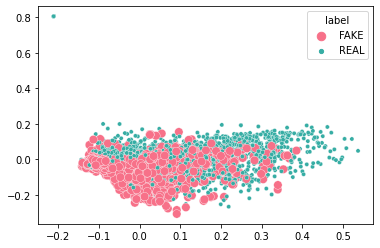

In [30]:
# plot the features
ax = sns.scatterplot(data2D[:,0], data2D[:,1], hue=y_train,size=y_train,palette="husl")

Passive Aggressive Algorithm is an **Online-Learning** Algorithm
How Passive-Aggressive Algorithms Work:
Passive-Aggressive algorithms are called so because :

**Passive**: If the prediction is correct, keep the model and do not make any changes. i.e., the data in the example is not enough to cause any changes in the model. 

**Aggressive**: If the prediction is incorrect, make changes to the model. i.e., some change to the model may correct it.

In [31]:
# Initialize a PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(tfidf_train, y_train)

# Predict on the test set and calculate accuracy
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits = 3)

print(f'Accuracy: {round(score*100,2)}%')
print(report)


Accuracy: 93.84%
              precision    recall  f1-score   support

        FAKE      0.922     0.952     0.937       609
        REAL      0.955     0.926     0.940       658

    accuracy                          0.938      1267
   macro avg      0.938     0.939     0.938      1267
weighted avg      0.939     0.938     0.938      1267



In [32]:
random.choice(x_test)

KeyError: ignored

In [33]:
# Build confusion matrix
confusion_matrix(y_test, y_pred, labels = ['FAKE', 'REAL'])

array([[580,  29],
       [ 49, 609]])

In [34]:
f1_score(y_test, y_pred, average="weighted"), score

(0.9384595079821743, 0.9384372533543804)

## Assignment: 
* Visualize the Data with another vectorizer in 2D using PCA and Seaborn (`sns`)
* Use 2 other classifiers and compare their accuracy to the `PassiveAggressiveClassifier`

# Count Vectorizer

In [35]:
# Count Vectors as features
# create a count vectorizer object 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,HashingVectorizer
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(x_train)

# transform the training and validation data using count vectorizer object
count_train =  count_vect.transform(x_train)
count_test =  count_vect.transform(x_test)

In [36]:
# Initialize a TfidVectorizer
#tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

#tfidf_train = tfidf_vectorizer.fit_transform(x_train)
#tfidf_test = tfidf_vectorizer.transform(x_test)

# PCA & SNS plot

In [37]:
pca = PCA(n_components=2).fit(count_train.toarray())
data2D = pca.transform(count_train.toarray())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


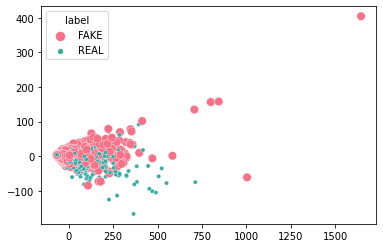

In [38]:
# plot the features
ax = sns.scatterplot(data2D[:,0], data2D[:,1], hue=y_train,size=y_train,palette="husl")

# Naive-Bayes Classification

In [39]:
# Initialize a PassiveAggressiveClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

nbm = MultinomialNB()
nbm.fit(count_train, y_train)

# Predict on the test set and calculate accuracy
y_pred = nbm.predict(count_test)
score = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits = 3)

print(f'Accuracy: {round(score*100,2)}%')
print(report)

Accuracy: 89.27%
              precision    recall  f1-score   support

        FAKE      0.910     0.862     0.885       609
        REAL      0.878     0.921     0.899       658

    accuracy                          0.893      1267
   macro avg      0.894     0.892     0.892      1267
weighted avg      0.893     0.893     0.892      1267



GaussianNB  is not working because of sparse data. MultinomialNB is used instead

In [40]:
# Build confusion matrix
confusion_matrix(y_test, y_pred, labels = ['FAKE', 'REAL'])

array([[525,  84],
       [ 52, 606]])

In [41]:
f1_score(y_test, y_pred, average="weighted"), score

(0.8924857969267888, 0.8926598263614838)

# SVC Classifier

In [42]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', C = 1.0)
svc.fit(count_train, y_train)

# Predict on the test set and calculate accuracy
y_pred = svc.predict(count_test)
score = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits = 3)

print(f'Accuracy: {round(score*100,2)}%')
print(report)


Accuracy: 84.93%
              precision    recall  f1-score   support

        FAKE      0.786     0.944     0.858       609
        REAL      0.936     0.761     0.840       658

    accuracy                          0.849      1267
   macro avg      0.861     0.853     0.849      1267
weighted avg      0.864     0.849     0.848      1267



In [43]:
# Build confusion matrix
confusion_matrix(y_test, y_pred, labels = ['FAKE', 'REAL'])

array([[575,  34],
       [157, 501]])

In [44]:
f1_score(y_test, y_pred, average="weighted"), score

(0.8483925191353425, 0.8492501973164956)

# Hashing Vectorizer

In [45]:
# getting train features
hash_vectorizer = HashingVectorizer(n_features=5000)
hash_vectorizer.fit(x_train)
xtrain_hash_vectorizer =  hash_vectorizer.transform(x_train) 
xtest_hash_vectorizer =  hash_vectorizer.transform(x_test)

In [46]:
hash_vectorizer.transform(x_train).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# PCA & SNS plot

In [47]:
pca = PCA(n_components=2).fit(xtrain_hash_vectorizer.toarray())
data2D = pca.transform(xtrain_hash_vectorizer.toarray())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


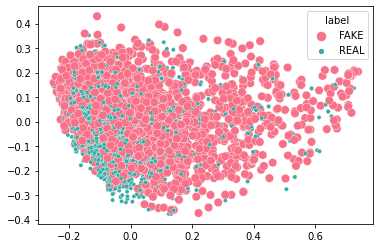

In [48]:
# plot the features
ax = sns.scatterplot(data2D[:,0], data2D[:,1], hue=y_train,size=y_train,palette="husl")

# Naive Bayes Multinomial

In [53]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler
from sklearn.pipeline import Pipeline
p = Pipeline([('Normalizing',StandardScaler(with_mean=False)),('MultinomialNB',MultinomialNB())])
p.fit(xtrain_hash_vectorizer,y_train) 

ValueError: ignored

In [50]:
# Initialize a PassiveAggressiveClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

nbm = MultinomialNB()
nbm.fit(xtrain_hash_vectorizer, y_train)

# Predict on the test set and calculate accuracy
y_pred = nbm.predict(xtest_hash_vectorizer)
score = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits = 3)

print(f'Accuracy: {round(score*100,2)}%')
print(report)

ValueError: ignored

# SVC Classifier

In [54]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', C = 1.0)
svc.fit(xtrain_hash_vectorizer, y_train)

# Predict on the test set and calculate accuracy
y_pred = svc.predict(xtest_hash_vectorizer)
score = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits = 3)

print(f'Accuracy: {round(score*100,2)}%')
print(report)

Accuracy: 92.58%
              precision    recall  f1-score   support

        FAKE      0.906     0.944     0.924       609
        REAL      0.946     0.909     0.927       658

    accuracy                          0.926      1267
   macro avg      0.926     0.926     0.926      1267
weighted avg      0.927     0.926     0.926      1267



In [55]:
# Build confusion matrix
confusion_matrix(y_test, y_pred, labels = ['FAKE', 'REAL'])

array([[575,  34],
       [ 60, 598]])

In [56]:
f1_score(y_test, y_pred, average="weighted"), score

(0.9258366442705879, 0.925808997632202)

# Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100,random_state = 8)
rf.fit(xtrain_hash_vectorizer, y_train)

# Predict on the test set and calculate accuracy
y_pred = rf.predict(xtest_hash_vectorizer)
score = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits = 3)

print(f'Accuracy: {round(score*100,2)}%')
print(report)


Accuracy: 89.74%
              precision    recall  f1-score   support

        FAKE      0.882     0.908     0.895       609
        REAL      0.912     0.888     0.900       658

    accuracy                          0.897      1267
   macro avg      0.897     0.898     0.897      1267
weighted avg      0.898     0.897     0.897      1267



In [58]:
# Build confusion matrix
confusion_matrix(y_test, y_pred, labels = ['FAKE', 'REAL'])

array([[553,  56],
       [ 74, 584]])

In [59]:
f1_score(y_test, y_pred, average="weighted"), score

(0.8974311090709576, 0.8973954222573007)

# Summary

The data is analyzed with count TF-IDF vectorizer and classified with Multinomial Naive Bayes and SVC and comapred with passive aggressive classifier. Passive-aggressive classifier has an accuracy of 94% where MultinomialNB has 89% and SVC has 84% accuracy respectively.  

For the case of Hash-vectorizing, the train data is classified with SVC -"rbf" kernel and Random forest classifier and got accuracy of 92% and 89% respectively. 